# PyBer Challenge

### 4.3 Loading and Reading CSV files

In [286]:
# Add Matplotlib inline magic command
%matplotlib inline

# Setup dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [287]:
# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Data Cleaning

In [288]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [289]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [290]:
city_data_df.head(7)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban


In [291]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [292]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [293]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [294]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

### Merge the DataFrames

In [295]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [296]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame

In [297]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
print (total_rides_by_city_type)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [298]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [299]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [300]:
#  4. Get the average fare per ride for each city type. 
avgfares_perride_by_city_type = total_fares_by_city_type / total_rides_by_city_type
avgfares_perride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [301]:
# 5. Get the average fare per driver for each city type. 
avgfare_perdriver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type
avgfare_perdriver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [302]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()

pyber_summary_df["Total Rides"] = total_rides_by_city_type
pyber_summary_df["Total Drivers"] = total_drivers_by_city_type
pyber_summary_df["Total Fares"] = total_fares_by_city_type
pyber_summary_df["Average Fare per Ride"] = avgfares_perride_by_city_type
pyber_summary_df["Average Fare per Driver"] = avgfare_perdriver_by_city_type

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [303]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [304]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [305]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [306]:
# 1. Read the merged DataFrame
#Renaming the columns in the PyBer Data DataFrame.
pyber_data_df = pyber_data_df.rename(columns =
                                     {"city": "City",
                                     "date": "Date", 
                                     "fare": "Fare", 
                                     "ride_id": "Ride Id",
                                     "driver_count": "No. Drivers",
                                     "type": "City Type"})

pyber_data_df.head(10)

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [307]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df_group = pyber_data_df.groupby(["City Type","Date"]).sum(["Fare"])
pyber_data_df_group.head()

Fare        Ride Id  No. Drivers
City Type Date                                                  
Rural     2019-01-01 09:45:36  43.69  2424875833354            1
          2019-01-02 11:18:32  52.12  3454018971635            1
          2019-01-03 19:51:01  19.90  5559509612597            8
          2019-01-04 03:31:26  24.88  4195619112933            8
          2019-01-06 07:38:40  47.33  3849747342021            4

In [308]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df = pyber_data_df.reset_index()
pyber_data_df.head(10)

,index,City,Date,Fare,Ride Id,No. Drivers,City Type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [309]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_data_df_pivot = pyber_data_df.pivot(index='Date',columns='City Type',values='Fare')
pyber_data_df_pivot.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [310]:
pyber_data_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [323]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_by_date = pyber_data_df_pivot.loc['2019-01-01':'2019-04-29']
pyber_by_date.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [324]:
# drop columns level_0 and index
drop_index = pyber_data_df.reset_index().drop(columns=['level_0', 'index'])
drop_index

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [325]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_by_date = pyber_by_date.reset_index()
pyber_by_date = pyber_by_date.set_index(pd.DatetimeIndex(pyber_by_date['Date']))



In [326]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2196 non-null   object 
 1   Rural     114 non-null    float64
 2   Suburban  573 non-null    float64
 3   Urban     1509 non-null   float64
dtypes: float64(3), object(1)
memory usage: 85.8+ KB


In [346]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

week_sum_df = pyber_by_date.resample('W').sum()

week_sum_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


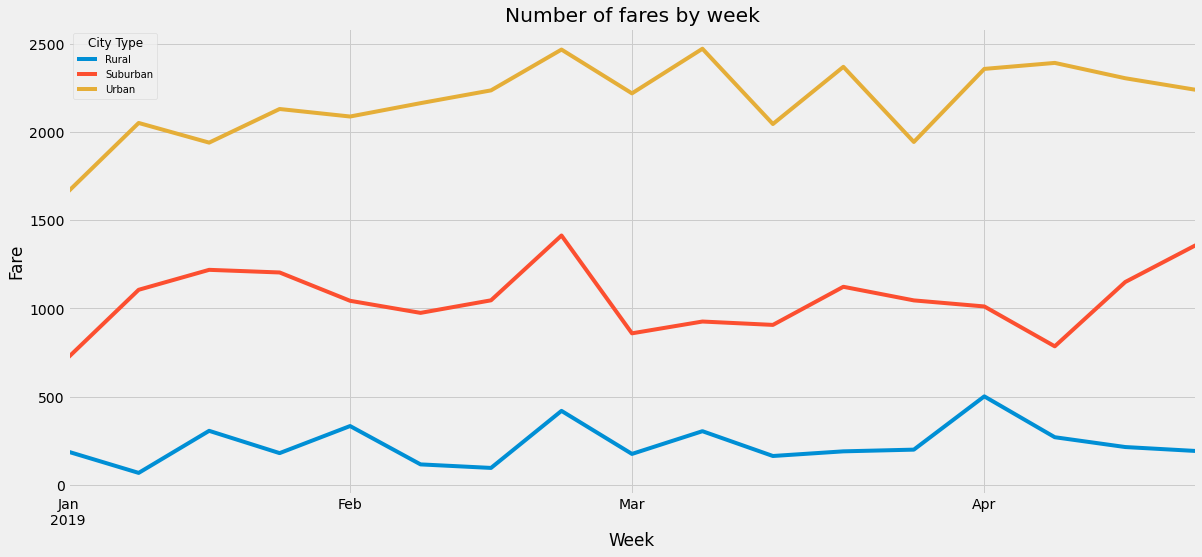

<Figure size 432x288 with 0 Axes>

In [347]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style


# Plot the resampled DataFrame.
week_sum_df = week_sum_df.plot(figsize = (18,8))
# Add a title 
week_sum_df.set_title("Number of fares by week")

#  Add a x- and y-axis label.
week_sum_df.set_xlabel("Week")
week_sum_df.set_ylabel("Fare")

lgnd = plt.legend(fontsize="10", loc="best", title="City Type")
lgnd.get_title().set_fontsize(12)

# Save image
plt.savefig("Analysis/PyBer_fare_summary.png")


plt.show()
plt.tight_layout()